# Imports

In [ ]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import scipy
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

sns.set_style('darkgrid')
np.random.seed(42)

# Generate random data based on prior

In [ ]:
# Define the multi-armed bandits
nb_bandits = 5  # Number of bandits
# True probability of winning for each bandit
p_bandits = [0.3, 0.5, 0.6, 0.8, 0.10]


def pull(i):
    """Pull arm of bandit with index `i` and return 1 if win, 
    else return 0."""
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

# Thompson Sampling

In [ ]:
# Define plotting functions
# Iterations to plot
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]


def plot(priors, step, ax):
    """Plot the priors for the current step."""
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')

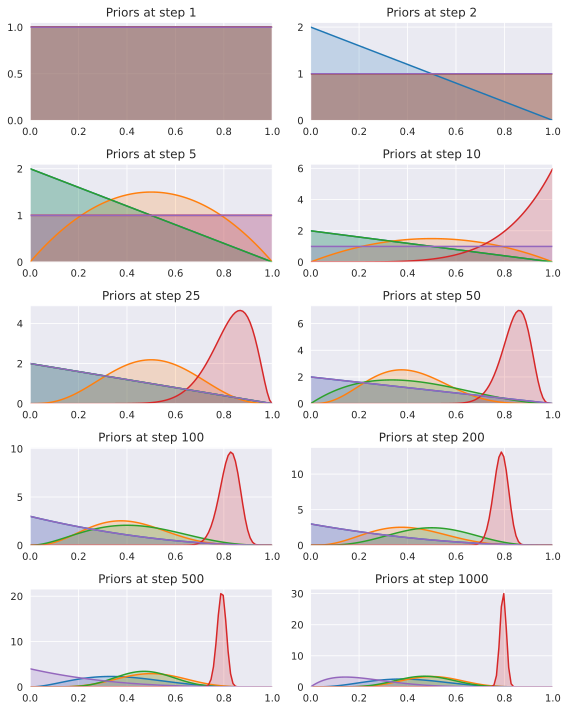

In [ ]:
# Simulate multi-armed bandit process and update posteriors

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0, 0, 0]  # Number of times we tried each bandit
wins = [0, 0, 0, 0, 0]  # Number of wins for each bandit
total_reward = 0

n = 1000
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    # plot prior 
    if step in plots:
        plot(bandit_priors, step, next(axs))
    # Sample a probability theta for each bandit
    theta_samples = [
        d.rvs(1) for d in bandit_priors
    ]
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    # Pull the bandit
    x = pull(chosen_bandit)
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x
    if (x == 1):
      total_reward += 1

plt.tight_layout()
plt.show()

In [ ]:
print(total_reward)

777


# Plot results

In [ ]:
# Print final outcome and number of test needed per bandit
emperical_p_bandits = [(1+w) / (1+t) for t, w in zip(trials, wins)]
for i in range(nb_bandits):
    print((f'True prob={p_bandits[i]:.2f};  '
           f'Emperical prob={emperical_p_bandits[i]:.2f};  '
           f'Trials={trials[i]:d}'))

True prob=0.30;  Emperical prob=0.44;  Trials=8
True prob=0.50;  Emperical prob=0.53;  Trials=16
True prob=0.60;  Emperical prob=0.50;  Trials=17
True prob=0.80;  Emperical prob=0.80;  Trials=952
True prob=0.10;  Emperical prob=0.25;  Trials=7


So changing the priors still lead to the best output with the best means. 

Next step: change rewards and have a reward matrix for each arm. Fix the priors based on past data (1000 steps?) Declare a win as a positive increase in the share value (maybe change it to the actual mean increment in gain)

# Loading data sets: CSV files

In [ ]:
with open('appl_5yrs.csv', newline='') as csvfile:
    data1 = list(csv.reader(csvfile))

with open('amd_5yrs.csv', newline='') as csvfile:
    data2 = list(csv.reader(csvfile))

with open('amzn_5yrs.csv', newline='') as csvfile:
    data3 = list(csv.reader(csvfile))

with open('msft_5yrs.csv', newline='') as csvfile:
    data4 = list(csv.reader(csvfile))

with open('qcom_5yrs.csv', newline='') as csvfile:
    data5 = list(csv.reader(csvfile))

appl = np.array(data1)
amd = np.array(data2)
amzn = np.array(data3)
msft = np.array(data4)
qcom = np.array(data5)

appl_start = appl[:,3]
appl_end   = appl[:,1]
appl_diff = []
appl_data = [0]*(appl_start.shape[0]-1)

amd_start = amd[:,3]
amd_end   = amd[:,1]
amd_diff = []
amd_data = [0]*(amd_start.shape[0]-1)

amzn_start = amzn[:,3]
amzn_end   = amzn[:,1]
amzn_diff = []
amzn_data = [0]*(amzn_start.shape[0]-1)

msft_start = msft[:,3]
msft_end   = msft[:,1]
msft_diff = []
msft_data = [0]*(msft_start.shape[0]-1)

qcom_start = qcom[:,3]
qcom_end   = qcom[:,1]
qcom_diff = []
qcom_data = [0]*(qcom_start.shape[0]-1)

#print(len(appl_data))
#print(appl_start.shape[0])
size = appl_start.shape[0]  # all sizes same

for i in range(1,size):
  diff1 = float(appl_end[i][1:]) - float(appl_start[i][1:])
  diff2 = float(amd_end[i][1:]) - float(amd_start[i][1:])
  diff3 = float(amzn_end[i][1:]) - float(amzn_start[i][1:])
  diff4 = float(msft_end[i][1:]) - float(msft_start[i][1:])
  diff5 = float(qcom_end[i][1:]) - float(qcom_start[i][1:])
  appl_diff.append(diff1)
  amd_diff.append(diff2)
  amzn_diff.append(diff3)
  msft_diff.append(diff4)
  qcom_diff.append(diff5)

for i in range(1,size-1):
  if (appl_diff[i] > 1):
    appl_data[i] = 1
  if (amd_diff[i] > 1):
    amd_data[i] = 1
  if (amzn_diff[i] > 1):
    amzn_data[i] = 1
  if (msft_diff[i] > 1):
    msft_data[i] = 1
  if (qcom_diff[i] > 1):
    qcom_data[i] = 1

# all the above five lists are in reverse order: lower the index, newer the data
# reverse the lists: lower the index, older the data - easier to traverse
appl_data.reverse()
amd_data.reverse()
amzn_data.reverse()
msft_data.reverse()
qcom_data.reverse()

# Number of 1s in the above lists
print(appl_data.count(1))
print(amd_data.count(1))
print(amzn_data.count(1))
print(msft_data.count(1))
print(qcom_data.count(1))

# possibility of gaining more than one dollar per day
nb_bandits = 5  # Number of bandits

def pullArm(i, step):
  if (i == 0):
    return appl_data[step]
  if (i == 1):
    return amd_data[step]
  if (i == 2):
    return amzn_data[step]
  if (i == 3):
    return msft_data[step]
  if (i == 4):
    return qcom_data[step]

# Setup plot
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0, 0, 0]  # Number of times we tried each bandit
wins = [0, 0, 0, 0, 0]  # Number of wins for each bandit
total_reward = 0

n = 1256
# Run the trail for `n` steps
for step in range(1, n+1):
    # Define the prior based on current observations
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    # plot prior 
    if step in plots:
        plot(bandit_priors, step, next(axs))
    # Sample a probability theta for each bandit
    #print(bandit_priors)
    theta_samples = [
        d.rvs(1) for d in bandit_priors
    ]
    # choose a bandit
    chosen_bandit = np.argmax(theta_samples)
    # Pull the bandit
    x = pullArm(chosen_bandit, step)
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x
    if (x == 1):
      total_reward += 1

plt.tight_layout()
plt.show()


171
166
591
300
207


StopIteration: ignored

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
print(trials)
print(wins)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]


# Stock visual

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


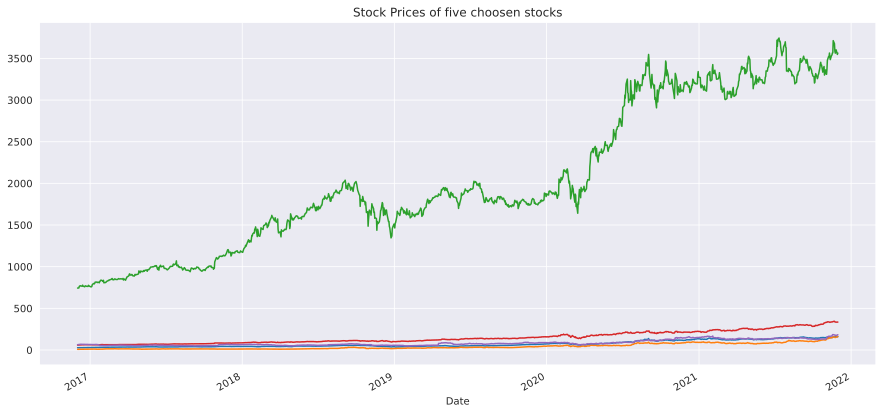

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf

%matplotlib inline
end = "2021-12-01"
start = '2016-12-02'
aapl_yf = yf.download('AAPL',start,end)
amd_yf = yf.download('AMD',start,end)
amzn_yf = yf.download('AMZN',start,end)
qcom_yf = yf.download('QCOM', start, end)
msft_yf = yf.download('MSFT', start, end)

aapl_yf['Open'].plot(label = 'Apple', figsize = (15,7))
amd_yf['Open'].plot(label = "AMD")
amzn_yf['Open'].plot(label = 'Amazon')
msft_yf['Open'].plot(label= "Microsoft")
qcom_yf['Open'].plot(label = "QCOM")
plt.title('Stock Prices of five choosen stocks')

appl_start_data = appl_start[1:]
amd_start_data = amd_start[1:]
amzn_start_data = amzn_start[1:]
msft_start_data = msft_start[1:]
qcom_start_data = qcom_start[1:]